# Jupyter Notebook per coincidence/detection DONEGAL

### TASK:


### WORKFLOW:


### Import libraries

In [1]:
# Per la gestione dei file
import os


# Per il calcolo numerico
import numpy as np

# Per la presentazione grafica dei risultati
import matplotlib
import matplotlib.pyplot as plt

# Per l'analisi dei dati sismici (download compreso)
import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy.taup import plot_travel_times
from obspy.core import Stream, read
from obspy.signal.trigger import coincidence_trigger




#Per visualizzare immagini
from IPython.display import Image
import matplotlib.image as image 


from pprint import pprint
import calendar




### Definizioni

In [2]:
YEAR=2013
MONTH=4
# Counting days in a month
NDAYS=calendar.monthrange(YEAR,MONTH)[1]

LAB_YEAR=str('%04d' % YEAR)
LAB_MONTH=str('%02d' % MONTH)

# Data directory
DONEGAL_DIR = "G:DONEGAL/"  # Setting Faderica
DONEGAL_DIR = "
#DONEGAL_DIR = "/Volumes/CHALLENGER/DONEGAL-MSEED/"  # Setting Faderica

# Info on seismic stations
stat_file= 'DL_151130.txt'

# Read station info

NET = []
STAT = []

statfile = open(stat_file, 'r')
linestoken=statfile.readlines()
nstat=0
il=0
for x in linestoken:

    if il>0:
        NET.append(x.split()[0])
        STAT.append(x.split()[1])
        nstat += 1
    il+=1

print('Number of seismic stations: ', nstat )


Number of seismic stations:  13


### (1) Process coincidence trigger for all days in selected month

In [3]:

#Cycle on each day in the month
DAY=17
while DAY <= 17:
    
    LAB_DAY=str('%02d' % DAY)



    # Check single MSEED file for each station
    
    print('\n\n --------------------------------------- DAY: ', YEAR, MONTH, DAY)

    dt = UTCDateTime(YEAR,MONTH,DAY)
    jd_sele=dt.julday
    jd_sele_lab=str('%03d' % jd_sele)
    print('Selected Julday: ', jd_sele, jd_sele_lab)
    year0=str(YEAR)

    files =  []

    print('CONTROLLO ESISTENZA TRACCE')
    
    istat=0
    while istat < nstat:
        net0=NET[istat]
        stat0=STAT[istat]
        mseed_file= DONEGAL_DIR + year0 + '/' + net0 + '/' + stat0 + '/HHZ.D/' + net0 + '.'+ stat0 + '..HHZ.D.' + year0 + '.' + jd_sele_lab
        #print(mseed_file)

        if os.path.exists(mseed_file):

            files.append(mseed_file)
            print('DATA  EXIST for stat: ', net0, stat0)

        else:

            print(' ---------> DATA DO NOT EXIST ... ', net0, stat0)

        istat +=1






# Legge i dati delle stazioni selezionate (quelle per cui esiste il file Z)

    st = Stream()
    for filename in files:
        st += read(filename)
    print('LETTURA TRACCE:')
    print(st)



# Filtro delle tracce, se ce ne fosse bisogno

    print('FILTRO TRACCE')
    st.filter('bandpass', freqmin=10, freqmax=20)  # optional prefiltering

# Applico il coincidence trigger
    print('TRIGGER TRACCE')
    st2 = st.copy()
    trig = coincidence_trigger("recstalta", 5, 1, st2, 6 ,sta=0.5, lta=10)


    

# Define trigger time and write in a file

    DAYNAME = LAB_YEAR + LAB_MONTH + LAB_DAY
    trig_file1 = 'output/OUTPUT_TRIGGER/' + DAYNAME + '.trigger'
    trig_file2 = 'output/OUTPUT_TRIGGER_DETAILS/' + DAYNAME + '.trigger_details'
    
    trig_time_stations=open(trig_file1,'w')
    trig_details=open(trig_file2,'w')

    trig_0 = {}
    trig_time_all = []
    stat_all = []
    stat = []

    # All triggers, all keys (FOR DEBUGGING)
    pprint(trig,stream=trig_details)
    trig_details.flush()
    trig_details.close()


    # Define trigger time and write in a file
    n_triggers=len(trig)
    print('Found: ', n_triggers,' trigger ...')

    it=0
    while it < n_triggers:
        trig_0 = trig[it]
        trig_time=trig_0['time']
        stat=trig_0['stations']
        nstat_trig=len(stat)
        print(it, trig_time, nstat_trig, *stat)
        print(it, trig_time, nstat_trig, *stat, file=trig_time_stations)
        #trig_time_stations.write(it, trig_time, stat)    
        trig_time_all.append(trig_time)
        stat_all.append(stat)
        it+=1
        
    trig_time_stations.flush()
    trig_time_stations.close()

    
    DAY += 1
                     



 --------------------------------------- DAY:  2013 4 17
Selected Julday:  107 107
CONTROLLO ESISTENZA TRACCE
 ---------> DATA DO NOT EXIST ...  SM DL10
DATA  EXIST for stat:  SM DL11
DATA  EXIST for stat:  SM DL12
 ---------> DATA DO NOT EXIST ...  SM DL13
 ---------> DATA DO NOT EXIST ...  SM DL14
DATA  EXIST for stat:  SM DL21
DATA  EXIST for stat:  SM DL22
DATA  EXIST for stat:  SM DL23
DATA  EXIST for stat:  SM DL24
DATA  EXIST for stat:  SM DL31
DATA  EXIST for stat:  EI IDGL
DATA  EXIST for stat:  IS D32
DATA  EXIST for stat:  IS D34
LETTURA TRACCE:
10 Trace(s) in Stream:
SM.DL11..HHZ   | 2013-04-17T00:00:00.000000Z - 2013-04-17T23:59:59.990000Z | 100.0 Hz, 8640000 samples
SM.DL12..HHZ   | 2013-04-17T00:00:00.000000Z - 2013-04-17T23:59:59.990000Z | 100.0 Hz, 8640000 samples
SM.DL21..HHZ   | 2013-04-17T00:00:00.000000Z - 2013-04-17T23:59:59.990000Z | 100.0 Hz, 8640000 samples
SM.DL22..HHZ   | 2013-04-17T00:00:00.000000Z - 2013-04-17T23:59:59.990000Z | 100.0 Hz, 8640000 samples


In [4]:
from scipy.signal import butter, sosfilt, sosfreqz

def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y
    
    
lowcut = 10.0                           # Band-pass Filter Low limit
highcut = 20.0                          # Band-pass Filter High limit







 -------------------------------------- DAY:  20130417
Number of triggers:  2


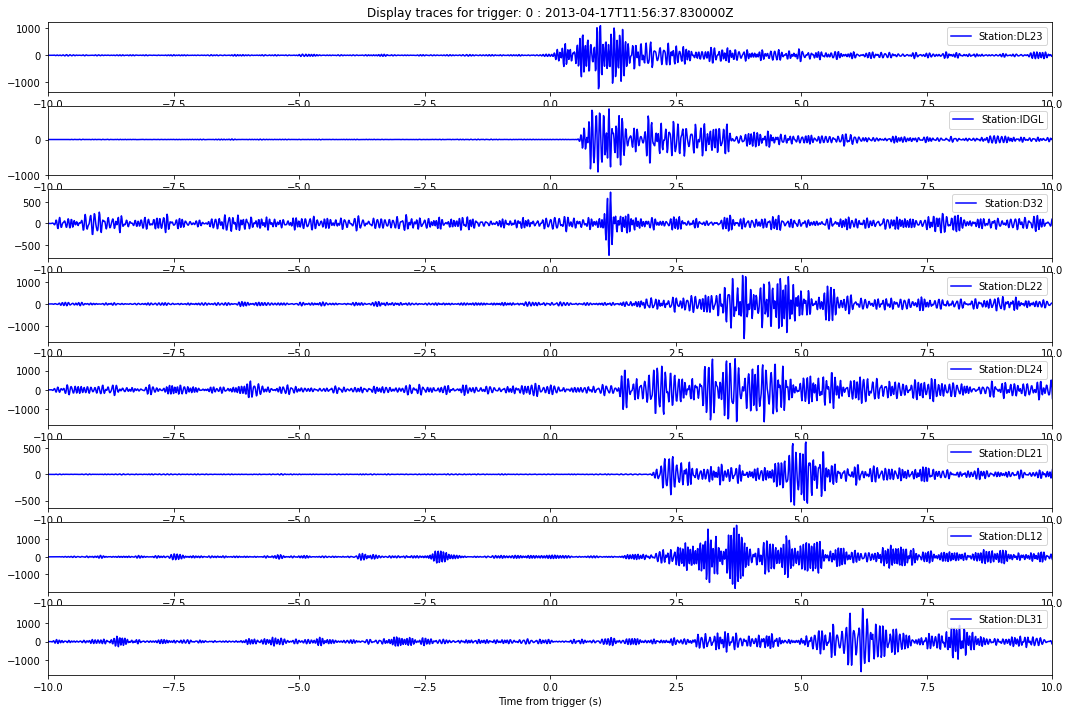

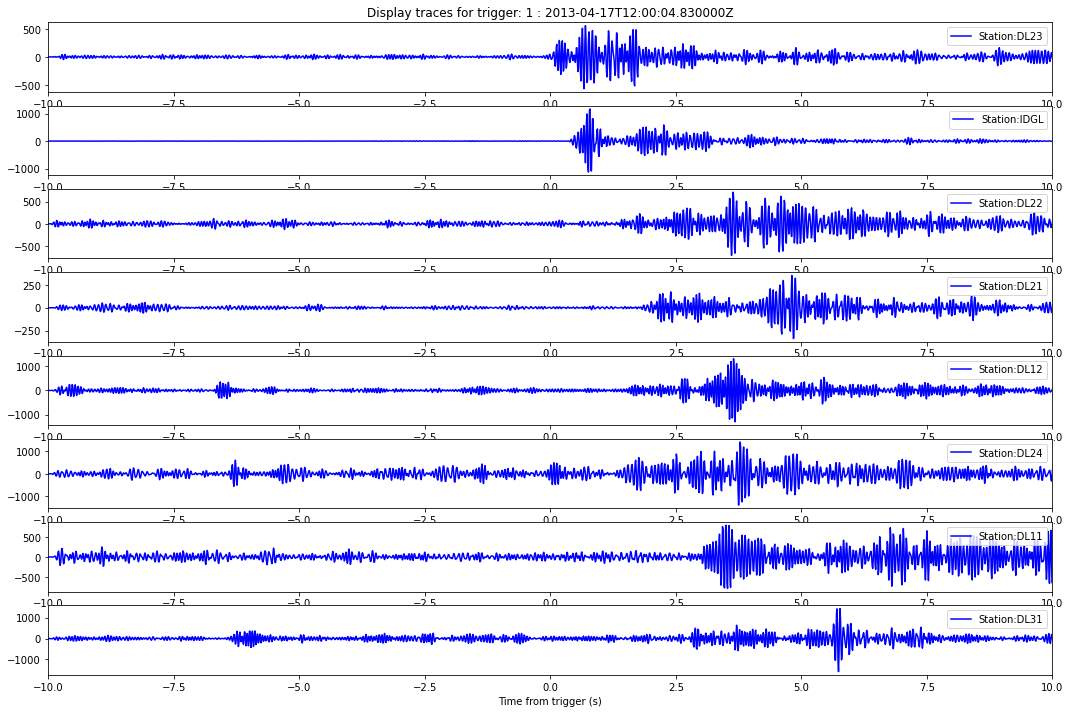

In [ ]:


#Cycle on each day in the month

DAY=17
while DAY <= 17:
    
    LAB_DAY=str('%02d' % DAY)
    
# Open file for saving true events 

    DAYNAME = LAB_YEAR + LAB_MONTH + LAB_DAY
    trig_file2 = 'output/OUTPUT_TRIGGER_SAVED/' + DAYNAME + '.trigger_saved'
    trig_time_stations_saved=open(trig_file2,'w')


    
# READ TRIGGER FROM FILE

    DAYNAME = LAB_YEAR + LAB_MONTH + LAB_DAY
    trig_file1 = 'output/OUTPUT_TRIGGER/' + DAYNAME + '.trigger'
    trig_time_stations=open(trig_file1,'r')
    
    trig_0 = {}
    trig_time_all = []
    stat_all = []

    
    linestoken=trig_time_stations.readlines()

    n_triggers=0
    for x in linestoken:
        n_triggers += 1
        trig_time=x.split()[1]
        trig_time=UTCDateTime(trig_time)
        trig_time_all.append(trig_time)
        nstat_trig=int(x.split()[2])
        stat = []
        istat=0
        while istat < nstat_trig:
            stat0=x.split()[3+istat]
            stat.append(stat0)
            istat += 1
        stat_all.append(stat)
        
    print('\n\n\n\n -------------------------------------- DAY: ', DAYNAME)
    print('Number of triggers: ', n_triggers )

    
    
    
# Read available streams
# Check single MSEED file for each station
    dt = UTCDateTime(YEAR,MONTH,DAY)
    jd_sele=dt.julday
    jd_sele_lab=str('%03d' % jd_sele)
    year0=str(YEAR)
    files =  []
    istat=0
    while istat < nstat:
        net0=NET[istat]
        stat0=STAT[istat]
        mseed_file= DONEGAL_DIR + year0 + '/' + net0 + '/' + stat0 + '/HHZ.D/' + net0 + '.'+ stat0 + '..HHZ.D.' + year0 + '.' + jd_sele_lab
        if os.path.exists(mseed_file):
            files.append(mseed_file)
        istat +=1

# Legge i dati delle stazioni selezionate (quelle per cui esiste il file Z)
    st = Stream()
    for filename in files:
        st += read(filename)
    st.filter('bandpass', freqmin=10, freqmax=20) 
    

# Faccio plot dei singoli trigger per vedere se sono eventi o sono rumore

    it=0
    while it < n_triggers:

        TRIG_SELE=str(it)
        time_start=trig_time_all[it]-10
        time_end=trig_time_all[it]+10
        TRIG_TIME=str(trig_time_all[it])
        st3=st.copy()
        st3.trim(time_start,time_end)


        stat=stat_all[it]
        Nstat=len(stat)
        fig_size=1.5*Nstat
        fig = plt.figure(figsize=(18, fig_size))

        istat=0
        while istat < Nstat:
            stat0=stat[istat]

            itr=0
            while itr < len(st3):
                tr_filt = []
                tr0 = st3[itr]
                if tr0.stats.station == stat0:

                    tr_filt = butter_bandpass_filter(st3[itr], lowcut, highcut, 100, order=6)
                    t0=np.arange(-10,10+0.01,1/100) 
                    label0= 'Station:' + stat0
                    ax = fig.add_subplot(Nstat, 1, istat+1)
                    ax.set_xlim(-10,10)
                    if istat == 0:
                        ax.set_title('Display traces for trigger: ' + TRIG_SELE+' : '+ TRIG_TIME)
                    ax.plot(t0,tr_filt, "b-", label=label0)
                    plt.legend(loc='upper right')

                itr += 1

            istat += 1 

        plt.xlabel('Time from trigger (s)')    
        plt.show()

        it += 1

    
    itr_sele=0
    while itr_sele >=0:
        TRIG_to_save=input("Insert trigger number to be saved. Insert -1 to exit:")
        itr_sele=int(TRIG_to_save)
        if itr_sele >= 0:
            TYPE_of_EQ=input("Insert L for local, R for regional, B for Blast:")
        il=0
        for x in linestoken:
            if il == itr_sele:
                print(TYPE_of_EQ, x, file=trig_time_stations_saved, end='')
            il+=1
            
    trig_time_stations_saved.flush()
    trig_time_stations_saved.close()
    trig_time_stations.close()
        
    
    
    resume_day = input("Press RETURN to resume")
       
# Go to next day

    DAY +=1

   

# 

In [6]:


%load_ext watermark
%watermark -v -p numpy,matplotlib,obspy,ipywidgets,obspy,pandas,wget
print (" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.28.0

numpy     : 1.21.2
matplotlib: 3.5.0
obspy     : 1.2.2
ipywidgets: 7.6.5
pandas    : 1.3.3
wget      : not installed

 
Last updated: Fri Feb 04 2022 11:01:58ora solare Europa occidentale

